# Description of the Algorithms

This code implements a Q-learning algorithm for training an agent to play the "BreakoutNoFrameskip-v4" environment from the OpenAI Gym. The agent uses Q-learning with discrete state-action space to learn the optimal policy.

## Key Components

### Environment Setup
- The environment is created using `gym.make('BreakoutNoFrameskip-v4')`.

### Frame Preprocessing
- The function `preprocess_frame` converts the RGB frames to grayscale, resizes them to 84x84 pixels, and normalizes the pixel values.

### Parameters
- `alpha`: Learning rate.
- `gamma`: Discount factor.
- `epsilon`: Initial exploration rate for epsilon-greedy policy.
- `epsilon_min`: Minimum value of epsilon.
- `epsilon_decay`: Decay rate for epsilon.
- `episodes`: Number of training episodes.
- `n_bins`: Number of bins for discretizing the state space.

### Discretization
- The state space is discretized using `np.digitize` to map continuous state values into discrete bins.

### Q-table Initialization
- The Q-table is initialized as a zero array with dimensions corresponding to the discretized state space and the action space of the environment.

### Action Selection
- The `choose_action` function implements an epsilon-greedy policy to select actions.

### Q-table Update
- The `update_q_table` function updates the Q-values using the Q-learning update rule.

### Training Loop
- The agent is trained for a specified number of episodes. In each episode:
  - The environment is reset, and the initial state is preprocessed and discretized.
  - Actions are chosen using the epsilon-greedy policy.
  - The Q-table is updated based on the Q-learning update rule.
  - Total rewards for each episode are recorded.
  - The epsilon value is decayed after each episode to reduce exploration over time.

### Saving the Q-table
- The trained Q-table is saved to a file `q_table.pkl` using the `pickle` library.

### Plotting Results
- The total rewards per episode are plotted to visualize the learning progress.

Episode: 1, Total Reward: 1.0, Epsilon: 0.999
Episode: 2, Total Reward: 0.0, Epsilon: 0.998001
Episode: 3, Total Reward: 1.0, Epsilon: 0.997002999
Episode: 4, Total Reward: 0.0, Epsilon: 0.996005996001
Episode: 5, Total Reward: 4.0, Epsilon: 0.995009990004999
Episode: 6, Total Reward: 0.0, Epsilon: 0.994014980014994
Episode: 7, Total Reward: 1.0, Epsilon: 0.993020965034979
Episode: 8, Total Reward: 1.0, Epsilon: 0.9920279440699441
Episode: 9, Total Reward: 0.0, Epsilon: 0.9910359161258742
Episode: 10, Total Reward: 2.0, Epsilon: 0.9900448802097482
Episode: 11, Total Reward: 0.0, Epsilon: 0.9890548353295385
Episode: 12, Total Reward: 2.0, Epsilon: 0.988065780494209
Episode: 13, Total Reward: 1.0, Epsilon: 0.9870777147137147
Episode: 14, Total Reward: 1.0, Epsilon: 0.986090636999001
Episode: 15, Total Reward: 2.0, Epsilon: 0.9851045463620021
Episode: 16, Total Reward: 0.0, Epsilon: 0.98411944181564
Episode: 17, Total Reward: 2.0, Epsilon: 0.9831353223738244
Episode: 18, Total Reward: 1.0

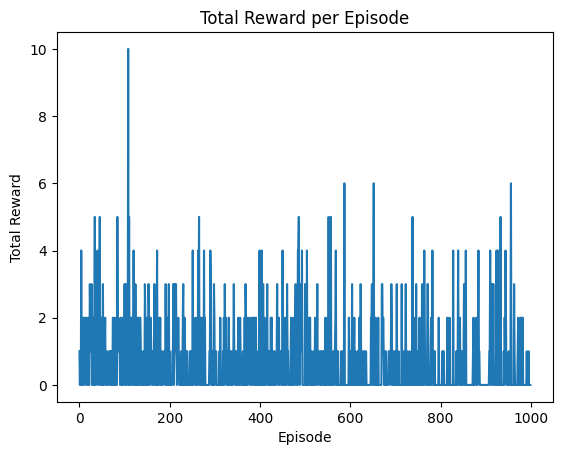

In [4]:
import gym
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt


env = gym.make('BreakoutNoFrameskip-v4')

def preprocess_frame(frame):
    if not isinstance(frame, np.ndarray):
        frame = np.array(frame)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    resized_frame = cv2.resize(gray_frame, (84, 84))
    normalized_frame = resized_frame / 255.0  
    return normalized_frame

# Parameters
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.999
episodes = 1000
n_bins = [10, 10, 10, 10]  # Example: 4 dimensions with 10 bins each
bins = [np.linspace(0, 1, b + 1)[1:-1] for b in n_bins]
q_table = np.zeros(n_bins + [env.action_space.n])

# Discretize the state for Q-Learning
def discretize_state(state, bins):
    discretized = []
    for i, bin_edges in enumerate(bins):
        discretized.append(np.digitize(state[i], bin_edges))
    return tuple(discretized)

# Create discretized bins
def create_bins(n_bins):
    bins = [np.linspace(0, 1, b + 1)[1:-1] for b in n_bins]
    return bins

bins = create_bins(n_bins)

# Choose action
def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

# Update the Q table
def update_q_table(state, action, reward, next_state, next_action):
    td_target = reward + gamma * q_table[next_state][next_action]
    td_error = td_target - q_table[state][action]
    q_table[state][action] += alpha * td_error

total_rewards = []

# Train agent
for episode in range(episodes):
    obs, _ = env.reset()
    state = preprocess_frame(obs).flatten()
    state = discretize_state(state, bins)
    action = choose_action(state)
    done = False
    total_reward = 0
    
    while not done:
        next_obs, reward, terminated, truncated, _ = env.step(action)
        next_state = preprocess_frame(next_obs).flatten()
        next_state = discretize_state(next_state, bins)
        next_action = choose_action(next_state)
        total_reward += reward
        
        update_q_table(state, action, reward, next_state, next_action)
        state = next_state
        action = next_action
        
        done = terminated or truncated
    
    total_rewards.append(total_reward)
    
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    
    print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {epsilon}")

# Save Q table
with open('q_table.pkl', 'wb') as f:
    pickle.dump(q_table, f)

env.close()

# Plotting total rewards
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()


### Result Analysis

The results of the Q-learning algorithm applied to the "BreakoutNoFrameskip-v4" environment are as follows:

#### Epsilon Decay
- **Initial Epsilon**: The exploration rate starts at 1.0, encouraging the agent to explore the environment extensively in the beginning.
- **Epsilon Decay**: The epsilon value decays gradually to approximately 0.3677 after 1000 episodes, promoting more exploitation over exploration as training progresses.

#### Total Rewards per Episode
- **Early Episodes**: In the early episodes, the agent achieves varying rewards, with a mix of both zero and higher rewards. This indicates that the agent is still exploring the environment and learning the optimal actions.
- **Middle Episodes**: As training continues, the total rewards per episode exhibit fluctuations, with occasional higher rewards, indicating that the agent is learning and occasionally finding more optimal actions.
- **Late Episodes**: Towards the later episodes, there is still significant variability in the rewards, but the frequency of zero-reward episodes increases. This suggests that while the agent has learned some aspects of the environment, it is not yet consistently achieving high rewards.

#### Overall Performance
- The plot shows a generally low level of total rewards per episode throughout the training process, with only occasional higher rewards.
- The significant variability and frequent zero-reward episodes suggest that the agent may need more training or that the current discretization and parameter settings may not be optimal for learning the task effectively.



# Description of the SARSA Algorithm

This code implements a SARSA (State-Action-Reward-State-Action) algorithm for training an agent to play the "BreakoutNoFrameskip-v4" environment from the OpenAI Gym. The agent uses SARSA with discrete state-action space to learn the optimal policy.

## Key Components

### Environment Setup
- The environment is created using `gym.make('BreakoutNoFrameskip-v4')`.

### Frame Preprocessing
- The function `preprocess_frame` converts the RGB frames to grayscale, resizes them to 84x84 pixels, and normalizes the pixel values.

### Parameters
- `alpha`: Learning rate.
- `gamma`: Discount factor.
- `epsilon`: Initial exploration rate for epsilon-greedy policy.
- `epsilon_min`: Minimum value of epsilon.
- `epsilon_decay`: Decay rate for epsilon.
- `episodes`: Number of training episodes.
- `n_bins`: Number of bins for discretizing the state space.

### Discretization
- The state space is discretized using `np.digitize` to map continuous state values into discrete bins.

### Q-table Initialization
- The Q-table is initialized as a zero array with dimensions corresponding to the discretized state space and the action space of the environment.

### Action Selection
- The `choose_action` function implements an epsilon-greedy policy to select actions.

### Q-table Update
- The `update_q_table` function updates the Q-values using the SARSA update rule.

### Training Loop
- The agent is trained for a specified number of episodes. In each episode:
  - The environment is reset, and the initial state is preprocessed and discretized.
  - Actions are chosen using the epsilon-greedy policy.
  - The Q-table is updated based on the SARSA update rule.
  - Total rewards for each episode are recorded.
  - The epsilon value is decayed after each episode to reduce exploration over time.

### Saving the Q-table
- The trained Q-table is saved to a file `sarsa_q_table.pkl` using the `pickle` library.

### Plotting Results
- The total rewards per episode are plotted to visualize the learning progress.

Episode: 1, Total Reward: 0.0, Epsilon: 0.999
Episode: 2, Total Reward: 1.0, Epsilon: 0.998001
Episode: 3, Total Reward: 1.0, Epsilon: 0.997002999
Episode: 4, Total Reward: 2.0, Epsilon: 0.996005996001
Episode: 5, Total Reward: 1.0, Epsilon: 0.995009990004999
Episode: 6, Total Reward: 0.0, Epsilon: 0.994014980014994
Episode: 7, Total Reward: 0.0, Epsilon: 0.993020965034979
Episode: 8, Total Reward: 0.0, Epsilon: 0.9920279440699441
Episode: 9, Total Reward: 1.0, Epsilon: 0.9910359161258742
Episode: 10, Total Reward: 3.0, Epsilon: 0.9900448802097482
Episode: 11, Total Reward: 1.0, Epsilon: 0.9890548353295385
Episode: 12, Total Reward: 1.0, Epsilon: 0.988065780494209
Episode: 13, Total Reward: 0.0, Epsilon: 0.9870777147137147
Episode: 14, Total Reward: 1.0, Epsilon: 0.986090636999001
Episode: 15, Total Reward: 0.0, Epsilon: 0.9851045463620021
Episode: 16, Total Reward: 5.0, Epsilon: 0.98411944181564
Episode: 17, Total Reward: 2.0, Epsilon: 0.9831353223738244
Episode: 18, Total Reward: 1.0

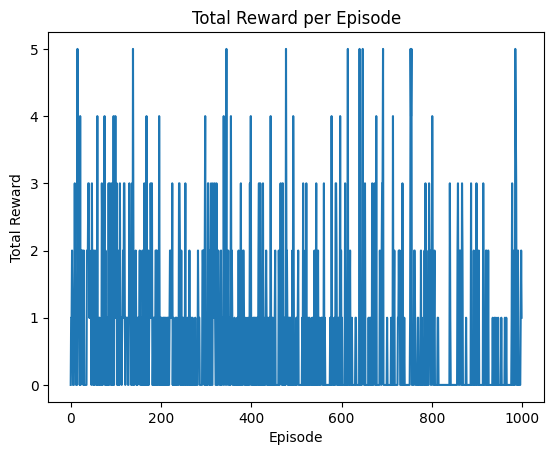

In [6]:
import gym
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt

env = gym.make('BreakoutNoFrameskip-v4')

def preprocess_frame(frame):

    if isinstance(frame, tuple):
        frame = frame[0]
    frame = np.array(frame)  
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    resized_frame = cv2.resize(gray_frame, (84, 84))
    normalized_frame = resized_frame / 255.0
    return normalized_frame

# Parameters
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.999  
episodes = 1000
n_bins = (10, 10)  
bins = [np.linspace(0, 1, b + 1)[1:-1] for b in n_bins]
q_table = np.zeros(n_bins + (env.action_space.n,))

# Discretize the state for Q-Learning
def discretize_state(state, bins):
    state = state.flatten()
    discretized = []
    for i, bin_edges in enumerate(bins):
        discretized.append(np.digitize(state[i], bin_edges) - 1)
    return tuple(discretized)

# Create discretized bins
def create_bins(n_bins):
    bins = [np.linspace(0, 1, b + 1)[1:-1] for b in n_bins]
    return bins

bins = create_bins(n_bins)

# Choose action
def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

# Update the Q table using SARSA
def update_q_table(state, action, reward, next_state, next_action):
    td_target = reward + gamma * q_table[next_state][next_action]
    td_error = td_target - q_table[state][action]
    q_table[state][action] += alpha * td_error

total_rewards = []

# Train agent using SARSA
for episode in range(episodes):
    obs = env.reset()
    obs = obs if isinstance(obs, np.ndarray) else obs[0]
    state = preprocess_frame(obs).flatten()
    state = discretize_state(state, bins)
    action = choose_action(state)
    done = False
    total_reward = 0
    
    while not done:
        next_obs, reward, terminated, truncated, _ = env.step(action)
        next_obs = next_obs if isinstance(next_obs, np.ndarray) else next_obs[0]
        next_state = preprocess_frame(next_obs).flatten()
        next_state = discretize_state(next_state, bins)
        next_action = choose_action(next_state)
        total_reward += reward
        
        update_q_table(state, action, reward, next_state, next_action)
        state = next_state
        action = next_action
        
        done = terminated or truncated
    
    total_rewards.append(total_reward)
    
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    
    print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {epsilon}")

# Save Q table
with open('sarsa_q_table.pkl', 'wb') as f:
    pickle.dump(q_table, f)

env.close()

# Plotting total rewards
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()


### Result Analysis

The results of the SARSA algorithm applied to the "BreakoutNoFrameskip-v4" environment are as follows:

#### Epsilon Decay
- **Initial Epsilon**: The exploration rate starts at 1.0, which encourages the agent to explore the environment extensively at the beginning.
- **Epsilon Decay**: The epsilon value gradually decays to approximately 0.3677 after 1000 episodes, promoting more exploitation over exploration as training progresses.

#### Total Rewards per Episode
- **Early Episodes**: In the initial episodes, the agent achieves a mix of zero and higher rewards. This indicates that the agent is exploring the environment and starting to learn the optimal actions.
- **Middle Episodes**: As training continues, the total rewards per episode exhibit fluctuations with occasional higher rewards, suggesting that the agent is learning and occasionally finding more optimal actions.
- **Late Episodes**: Towards the later episodes, there is still significant variability in the rewards. However, the frequency of higher rewards increases slightly, indicating some level of learning and improvement in performance.

#### Overall Performance
- The plot shows a relatively low level of total rewards per episode throughout the training process, with occasional peaks of higher rewards.
- The significant variability and frequent low-reward episodes suggest that the agent has learned some aspects of the environment but is not consistently achieving high rewards.
- The results indicate that the current discretization and parameter settings may need further tuning to improve the agent's performance.


